模型原理
应用 AHP 分析决策问题时，首先要把问题条理化、层次化，构造出一个有层次的结构模型在这个模型下，复杂问题被分解为元素的组成部分。这些元素文按其属性及关系形成若千层次。上一层次的元素作为准则对下一层次有关元素起支配作用。这些层次可以分为三类最高房:这一层次中只有一个元素，一般它是分析问题的预目标或理想结因此也称为目标层中向层这一层次中包含了为实现目标所涉及的中间环节，它可以由若干个层次组成，包括所需考虑的准则、子准则，因此也称为准则层。
底层)这一层次包括了为实现目标可供选择的各种措施、决策方案等，因此也称为措施层或方案层。

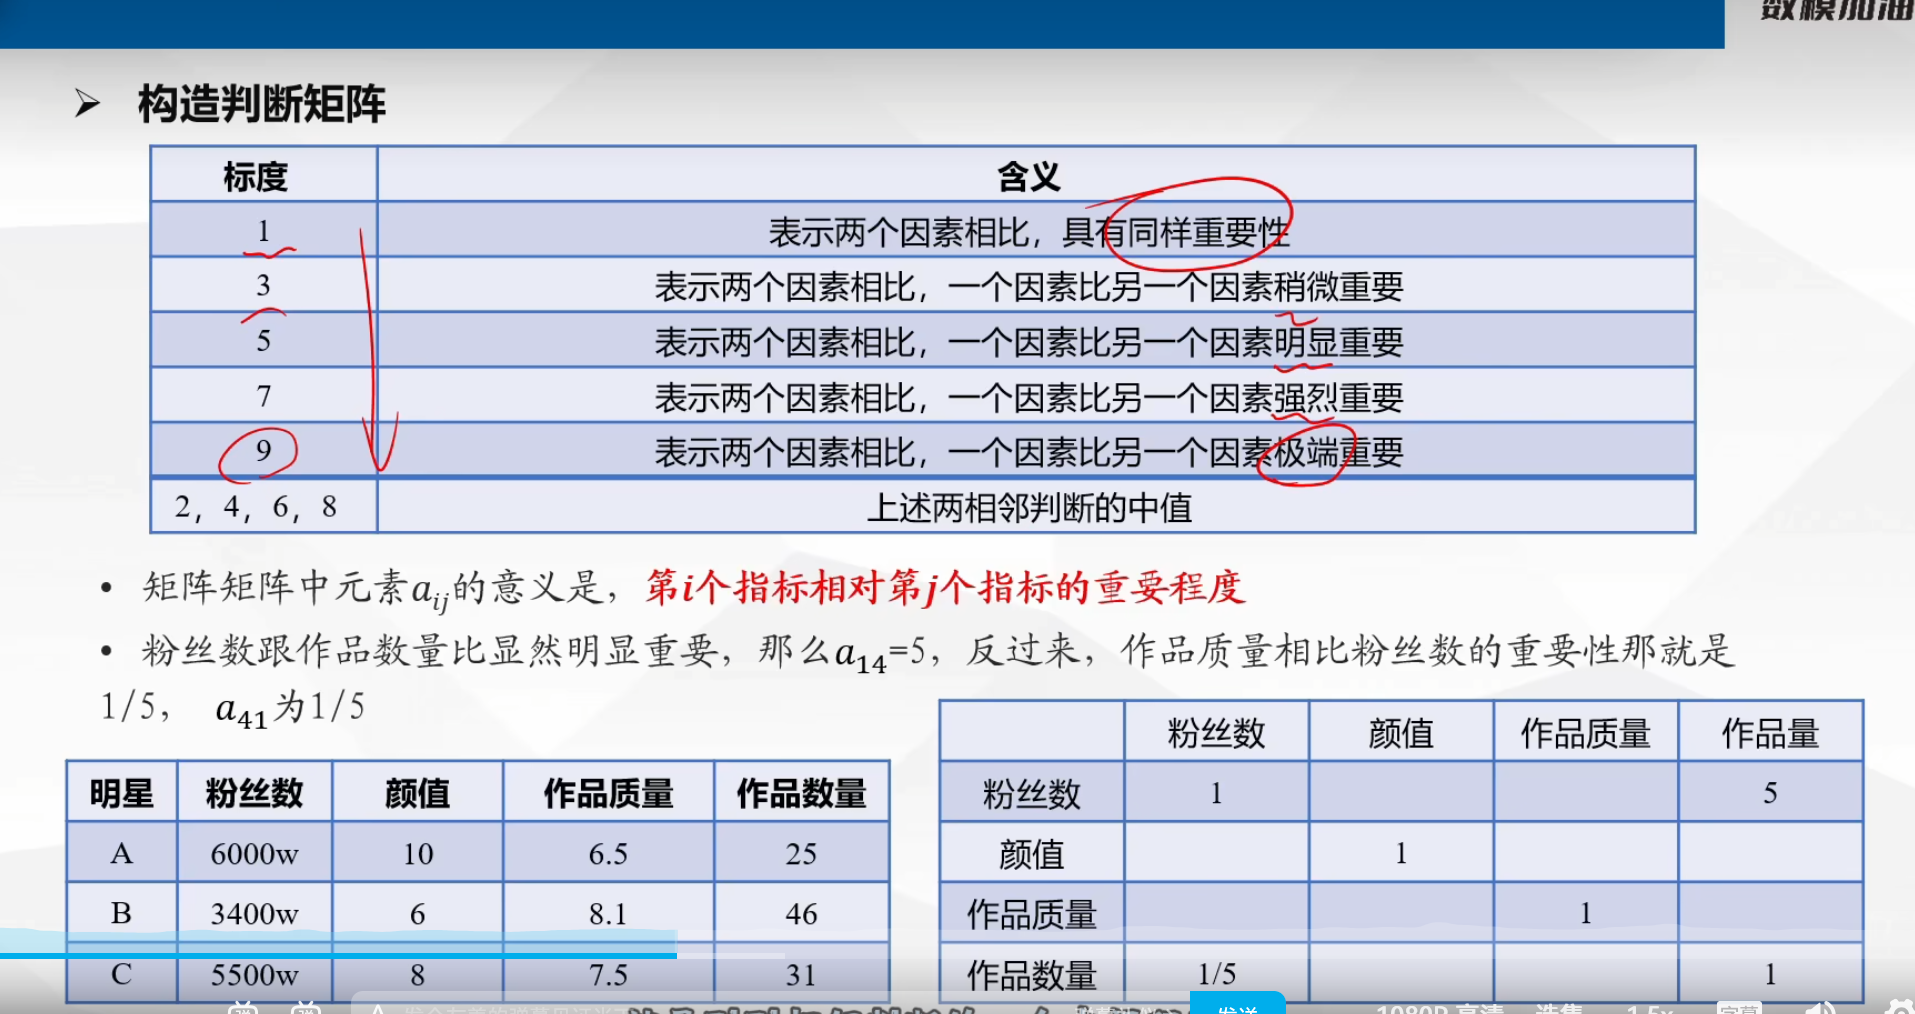

In [4]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-19 124746.png")

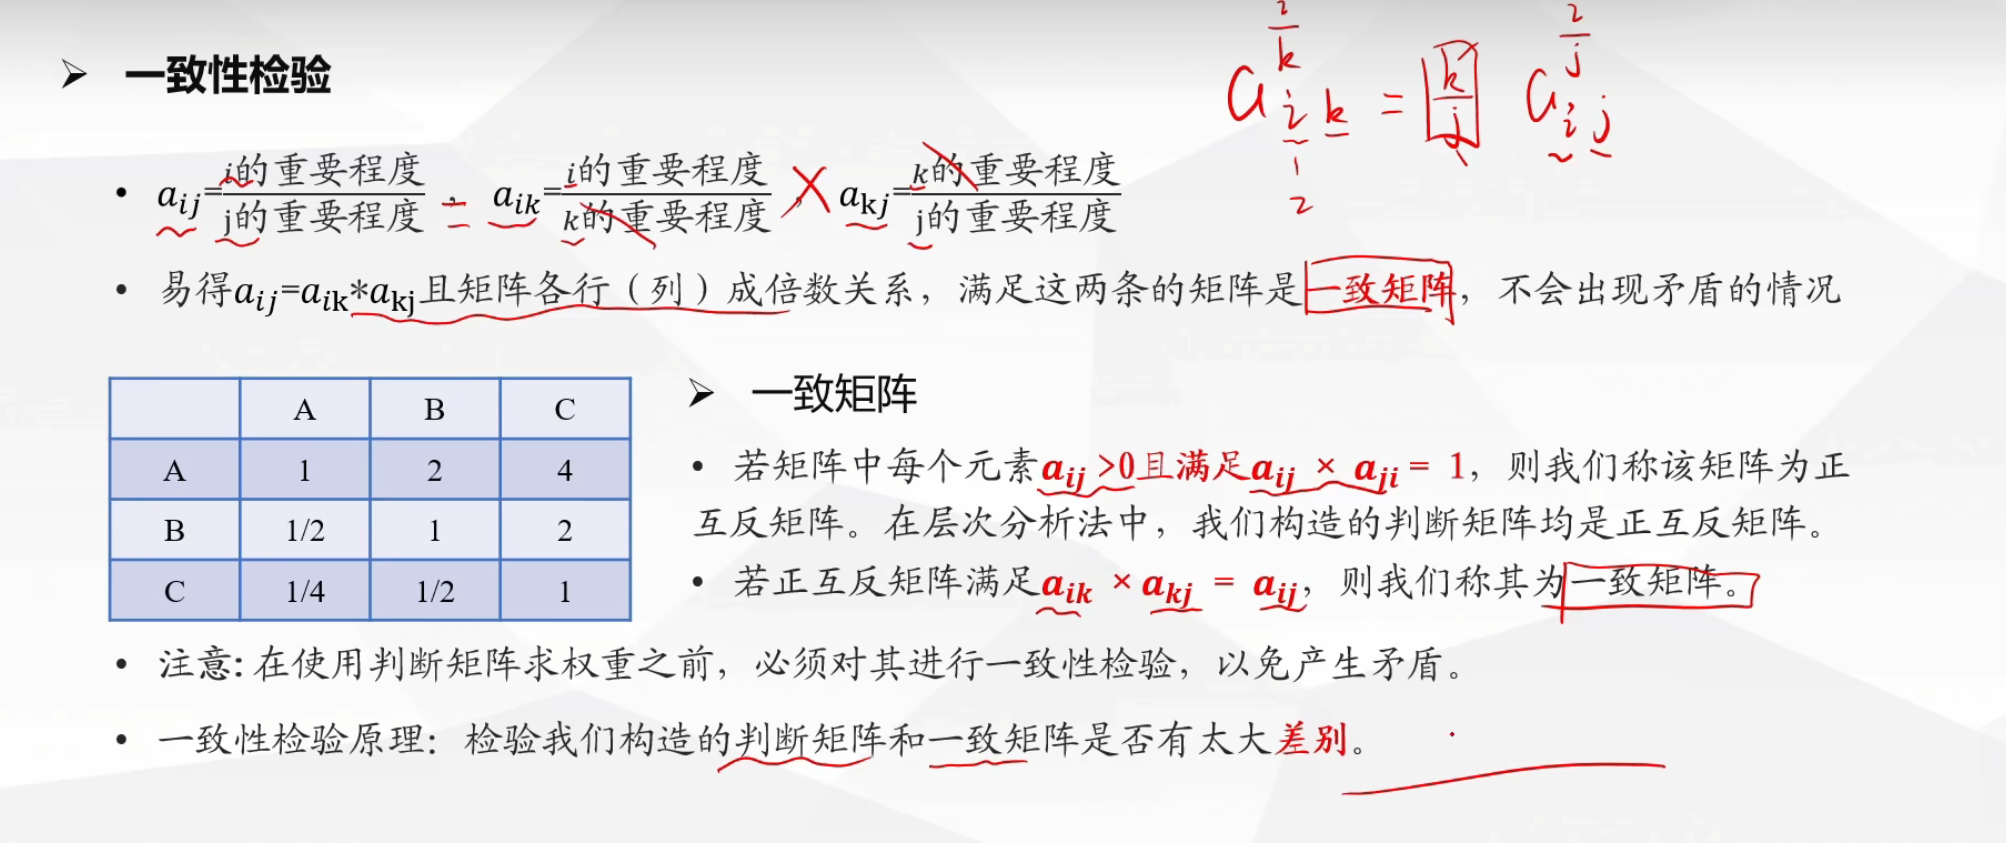

In [5]:
from IPython.display import Image
Image(filename='C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-19 125439.png')

#1.一致性检验

In [6]:
import numpy as np
A = np.array([[1,2,3,5],[1/2,1,1/2,2],[1/3,2,1,2],[1/5,1/2,1/2,1]])
n = A.shape[0] ## 获取A的行
A

array([[1.        , 2.        , 3.        , 5.        ],
       [0.5       , 1.        , 0.5       , 2.        ],
       [0.33333333, 2.        , 1.        , 2.        ],
       [0.2       , 0.5       , 0.5       , 1.        ]])

In [7]:
eig_vals, eig_vecs = np.linalg.eig(A)  ##eig_vals特征值,tig_vecs特征向量
eig_max = np.max(eig_vals)
eig_vals

array([ 4.11283004+0.j        , -0.06510522+0.67976113j,
       -0.06510522-0.67976113j,  0.01738039+0.j        ])

In [8]:
CI = (eig_max - n)/(n-1)
RI = [0,0.0001,0.52,0.89,1.12,1.36,1.41,1.46,1.49,1.52,1.54,1.56,1.58,1.59]
###此处的n=2时，一定是一致矩阵，所以CI = 0，为了避免分母为零所以取接近值。
CR = CI/RI[n-1]
print("一致性指标CI=",CI)
print("一致性比例RI=",RI)
if CR < 0.10:
    print('一致性可接受')
else:
    print()

一致性指标CI= (0.03761001273071566+0j)
一致性比例RI= [0, 0.0001, 0.52, 0.89, 1.12, 1.36, 1.41, 1.46, 1.49, 1.52, 1.54, 1.56, 1.58, 1.59]
一致性可接受


#2.算数平均法求权重

In [9]:
# 计算每列的和
# np.sum 函数可以计算一维数组中所有元素的总和,
# 还可以通过指定 axis 参数来计算多维数组的某个维度上的元素总和。例如，在二维数组中，axis=0 表示按列计算总和，axis=1 表示按行计算总和。
A = np.array([[1,2,3,5],[1/2,1,1/2,2],[1/3,2,1,2],[1/5,1/2,1/2,1]])
ASum = np.sum(A,axis = 0)
###归一法
Stand_A = A / ASum
ASumr = np.sum(Stand_A,axis = 1)
weights = ASumr / n
print(weights)

[0.48885991 0.18192996 0.2318927  0.09731744]


#3.几何平均法求权重


In [10]:
#将A中每一行元素相乘得到一列向量
# np.prod 函数可以计算一维数组中所有元素的乘积。
# 还可以通过指定 axis 参数来计算多维数组的某个维度上的元素乘积。例如，在二维数组中，axis=8 表示按列计算乘积，axis=1 表示按行计算乘积。
prod_A = np.prod(A,axis = 1)

#将新的向量的每个分量开n次方等价求1/n次方
# #np.power 是 NumPy 库中的一个函数，用于对数组中的元素进行幂运算。
# 例如，可以使用 np.power(a，b)对数组 a 中的每个元素都按照b指数进行运算。
power_A = np.power(prod_A,1/n)
#归一化处理
re_a = power_A / np.sum(power_A, axis = 0)
print(re_a)

[0.49492567 0.17782883 0.22724501 0.1000005 ]


#4.特征值法求权重

In [11]:
A = np.array([[1, 2, 3, 5], [1 / 2, 1, 1 / 2, 2], [1 / 3, 2, 1, 2], [1 / 5, 1 / 2, 1 / 2, 1]])
n = A.shape[0] 
eig_vals, eig_vecs = np.linalg.eig(A)  
eig_max = np.max(eig_vals)
#找出最大特征值的索引，np.argmax 是 NumPy 库中的一个函数，用于返回数组中最大值的索引
max_index = np.argmax(eig_vals)
trait_eig = eig_vecs[:,max_index]
weights = trait_eig / np.sum(trait_eig, axis = 0)
print(weights)


[0.4933895 +0.j 0.17884562+0.j 0.230339  +0.j 0.09742588+0.j]
